In [1]:
import pandas as pd
import numpy as np
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import re
from sklearn.metrics import accuracy_score
import pickle
import plotly.express as px
import glob

%matplotlib inline

In [2]:
df = pd.read_csv('titanicSummary.csv')

In [9]:
s = df.raw_json[0].replace("\'", "\"")

In [10]:
res = json.loads(s) 

In [11]:
res

{'package:base': ['as.factor',
  'gsub',
  'is.na',
  'mean',
  'nrow',
  'rbind',
  'rep',
  'round',
  'summary',
  'which'],
 'package:stats': ['binomial', 'glm', 'predict'],
 'package:utils': ['read.csv', 'str', 'write.csv']}

In [21]:
packs = map(lambda x: x.replace("\'", "\""), df.raw_json.values) 

In [22]:
df['packs'] = list(packs)

In [28]:
test = json.loads(df.packs[0])

In [30]:
str(test)

"{'package:base': ['as.factor', 'gsub', 'is.na', 'mean', 'nrow', 'rbind', 'rep', 'round', 'summary', 'which'], 'package:stats': ['binomial', 'glm', 'predict'], 'package:utils': ['read.csv', 'str', 'write.csv']}"

In [34]:
string_packages = map(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x), df.raw_json.values)

In [35]:
df['string_packs'] = list(string_packages)

### TF-IDF vectorizer

In [56]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import itertools
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.preprocessing import  MinMaxScaler, MaxAbsScaler
from sklearn.cluster import KMeans

In [38]:
corpus = list(df.raw_json.values)

["{'package:base': ['as.factor', 'gsub', 'is.na', 'mean', 'nrow', 'rbind', 'rep', 'round', 'summary', 'which'], 'package:stats': ['binomial', 'glm', 'predict'], 'package:utils': ['read.csv', 'str', 'write.csv']}",
 "{'package:base': ['as.data.frame', 'as.numeric', 'c', 'colnames', 'data.frame', 'duplicated', 'factor', 'gsub', 'ifelse', 'is.na', 'length', 'library', 'ncol', 'nrow', 'paste0', 'print', 'prop.table', 'return', 'sapply', 'seq', 'subset', 'sum', 'summary', 'table', 'which'], 'package:dplyr': ['funs', 'summarise_all'], 'package:ggplot2': ['aes', 'geom_bar', 'geom_boxplot', 'geom_text', 'ggplot', 'labs', 'position_dodge', 'scale_y_continuous'], 'package:rpart': ['rpart'], 'package:stats': ['median', 'predict'], 'package:utils': ['head', 'read.csv', 'str', 'write.csv']}",
 "{'character(0)': ['fill_age_by_title'], 'package:base': ['as.character', 'as.factor', 'as.numeric', 'c', 'data.frame', 'gsub', 'is.na', 'library', 'mean', 'round', 'sub', 'summary'], 'package:MASS': ['stepAI

In [42]:
vectorizer = TfidfVectorizer()
tfidfVectors = vectorizer.fit_transform(corpus)

In [50]:
dense_tfidf = tfidfVectors.todense()

In [51]:
dense_tfidf.shape

(416, 675)

In [53]:
df['dense_tf'] = list(dense_tfidf)

In [57]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(tfidfVectors)
    Sum_of_squared_distances.append(kmeans.inertia_)

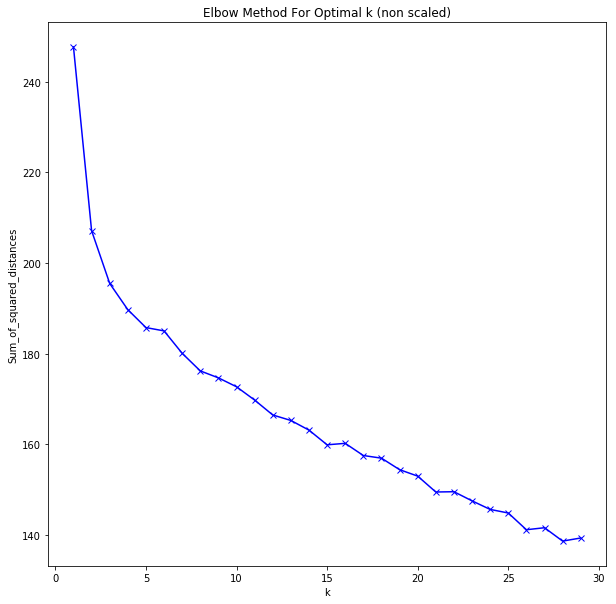

In [58]:
plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (non scaled)')
plt.show()

In [59]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(tfidfVectors)
kmeansLabels = kmeans.predict(tfidfVectors)

In [60]:
df['k-means_labels'] = kmeansLabels

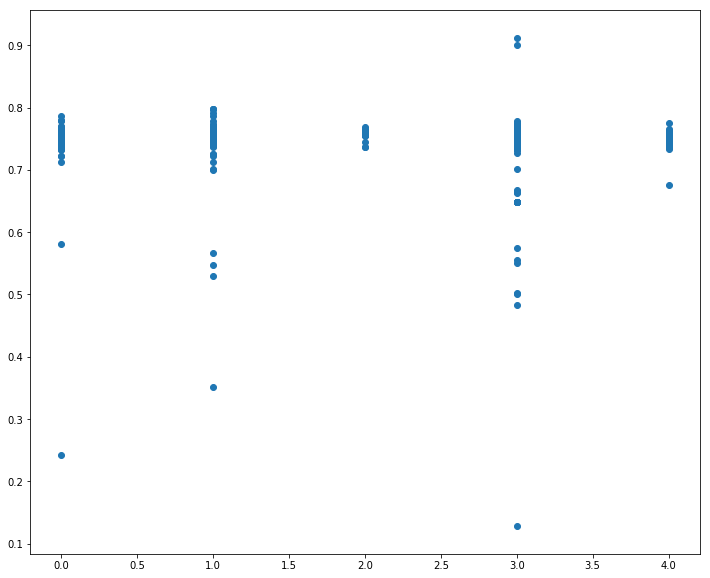

In [67]:
plt.figure(figsize=(12,10))
plt.scatter(x='k-means_labels', y='Accuracy', data=df)

In [71]:
df[df['k-means_labels'] == 3]

,Name,Accuracy,Functions,Packages,Runtime,Functions_by_users,Copy_of,most_similar,index_of_similarity,raw_json,dense_tf,k-means_labels
0,prabhulingayya-titanic-prediction-using-logist...,0.746,"['as.factor', 'gsub', 'is.na', 'mean', 'nrow',...",['base'],0.344873,"['gsub', 'rbind', 'nrow', 'predict', 'write.cs...",[],"['cnusapbo-titanic-r-code', 'joelweiss-titanic...","[0.9988202265519232, 0.5657821282835571, 0.497...","{'package:base': ['as.factor', 'gsub', 'is.na'...",[[[[[0. 0. 0. 0. ...,3
2,paulocressoni-titanic-using-stepwise-linear-re...,0.756,"['user defined', 'user defined', 'user defined...","['MASS', 'ggplot2', 'ggthemes', 'base']",0.956229,"['gsub', 'as.numeric', 'predict', 'sub', 'mean...",[],['annafreydenzon-titanic-machine-learning-from...,"[0.5025714535073201, 0.4914360717345071, 0.471...","{'character(0)': ['fill_age_by_title'], 'packa...",[[[[[0. 0. 0. 0. ...,3
4,jonmak-identify-travel-groups-in-titanic,0.734,"['user defined', 'user defined', 'user defined...","['ggplot2', 'readr', 'data.table', 'stringr', ...",16.105898,"['list', 'mean', 'as.logical', 'merge', 'geom_...",[],"['somtom-titanic-random-icebergs', 'rtreit-kag...","[0.6239748114808571, 0.2672313419911298, 0.170...","{'character(0)': ['`:=`'], 'package:base': ['a...",[[[[[0. 0. 0. 0. ...,3
7,ezhilvelme-titanic-neural-network-c-4-2,0.749,"['compute', 'as.factor', 'c', 'data.frame', 'g...","['dplyr', 'ggplot2', 'neuralnet', 'base']",5.067598,"['gsub', 'neuralnet', 'ifelse', 'write.csv', '...",[],['brirush-randomforest-implementation-of-titan...,"[0.5658840970531664, 0.5658840970531664, 0.529...","{'c(""package:neuralnet"", ""package:dplyr"")': ['...",[[[[[0. 0. 0. 0. ...,3
8,artsyanka-kernel1-titanic-r,0.701,"['as.character', 'as.numeric', 'c', 'cbind', '...","['caTools', 'randomForest', 'base']",0.717785,"['mean', 'ave', 'as.character', 'is.na', 'summ...",[],['thilakshasilva-predicting-titanic-survival-u...,"[0.09903837589370747, 0.09903837589370747, 0.0...","{'package:base': ['as.character', 'as.numeric'...",[[[[[0. 0. 0. 0. ...,3
13,balakesavan-titanicbalakesavan20160921,0.770,"['as.data.frame', 'as.numeric', 'c', 'colnames...","['caret', 'base']",1.676510,"['colnames', 'as.numeric', 'ifelse', 'confusio...",[],['prabhulingayya-titanic-prediction-using-logi...,"[0.09013728602561581, 0.09003094444888107, 0.0...","{'package:base': ['as.data.frame', 'as.numeric...",[[[[[0. 0. 0. 0. ...,3
14,francoisolivier-fork-of-titanic-20,0.754,"['user defined', 'user defined', 'user defined...","['ggplot2', 'randomForest', 'base']",8.593281,"['predict', 'write.csv', 'order', 'print', 'me...",[],"['fredman-titanic-barebones-benchmark-r', 'joh...","[0.9611258794100505, 0.9090130522680895, 0.898...","{'character(0)': ['extractFeatures'], 'package...",[[[[[0. 0. 0. 0. ...,3
18,paulbisto-r-titanic-script-practice,0.758,"['as.data.frame', 'as.factor', 'is.na', 'libra...","['ggplot2', 'randomForest', 'base']",3.029064,"['nrow', 'as.formula', 'facet_wrap', 'median',...",[],"['predact-easy-r-titanic-predictive-model', 's...","[0.9830643240199534, 0.9740289818085214, 0.957...","{'package:base': ['as.data.frame', 'as.factor'...",[[[[[0. 0. 0. 0. ...,3
28,sawajid-titanic-test,0.648,"['data.frame', 'library', 'rep', 'summary', 'r...","['randomForest', 'base']",0.266913,"['write.csv', 'data.frame', 'read.csv', 'summa...",[],"['zhaotianjing-titanic', 'sudheer464-predictio...","[0.7807151059767842, 0.7471574387017648, 0.646...","{'package:base': ['data.frame', 'library', 're...",[[[[[0. 0. 0. 0. ...,3
30,nashyegi-who-all-survived-the-titanic,0.773,"['user defined', 'user defined', 'user defined...","['ggplot2', 'readr', 'randomForest', 'base']",1.931335,"['nrow', 'list', 'mean', 'which', 'is.na', 'le...",[],"['youhe2482-titanic-a-very-first-step', 'nshre...","[0.6316655060516624, 0.6316655060516624, 0.580...","{'character(0)': ['grid.layout', 'grid.newpage...",[[[[[0. 0. 0. 0. ...,3


In [70]:
df.drop(columns=['packs', 'string_packs'], inplace=True)

## Reduce dimensionality and try different clustering algorithms

In [72]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=16)
pca = pca.fit_transform(dense_tfidf)

In [82]:
df['pca_16'] = list(pca)

In [84]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca)
    Sum_of_squared_distances.append(kmeans.inertia_)

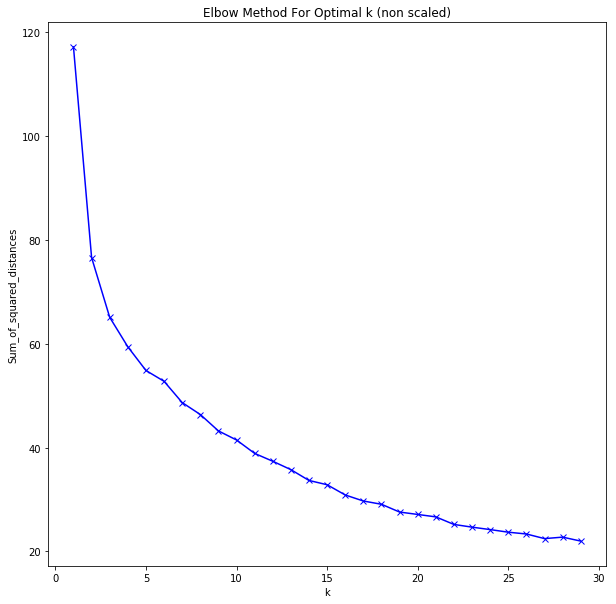

In [85]:
plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (non scaled)')
plt.show()

In [86]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(pca)
kmeansPcaLabels = kmeans.predict(pca)

In [91]:
kmeansPcaLabels

array([2, 2, 2, 3, 2, 4, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 1, 1, 2, 0, 3, 3,
       1, 3, 1, 0, 1, 1, 2, 1, 2, 1, 3, 1, 1, 0, 2, 1, 3, 1, 2, 3, 3, 2,
       4, 1, 1, 2, 3, 3, 1, 3, 1, 2, 2, 3, 2, 1, 3, 3, 0, 1, 1, 0, 4, 2,
       4, 3, 1, 3, 1, 1, 0, 1, 2, 3, 2, 3, 0, 3, 1, 0, 0, 2, 3, 3, 0, 0,
       3, 0, 0, 0, 3, 3, 3, 3, 1, 1, 2, 3, 1, 0, 2, 3, 3, 3, 0, 1, 1, 0,
       0, 1, 3, 1, 2, 2, 3, 0, 1, 1, 1, 3, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 2, 2, 2, 2, 3, 1, 1, 0, 0, 2, 3, 3, 2, 2, 0, 3, 3, 1,
       3, 3, 0, 1, 3, 3, 2, 1, 2, 1, 0, 3, 3, 3, 3, 2, 1, 1, 0, 1, 2, 0,
       1, 0, 0, 3, 3, 0, 3, 2, 3, 1, 2, 2, 2, 3, 1, 1, 3, 1, 0, 3, 0, 3,
       3, 3, 1, 0, 2, 3, 0, 1, 3, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 3,
       3, 1, 0, 3, 2, 0, 1, 4, 2, 1, 1, 3, 1, 0, 0, 1, 2, 3, 1, 1, 3, 0,
       2, 3, 0, 4, 3, 2, 1, 2, 3, 2, 3, 0, 1, 3, 2, 1, 2, 3, 1, 1, 1, 0,
       0, 3, 3, 3, 1, 3, 0, 0, 2, 2, 3, 1, 1, 0, 2, 3, 1, 2, 0, 2, 3, 0,
       2, 2, 2, 3, 1, 2, 3, 1, 3, 1, 0, 2, 1, 2, 2,

In [92]:
df['pca_16_k-means_labels'] = kmeansPcaLabels

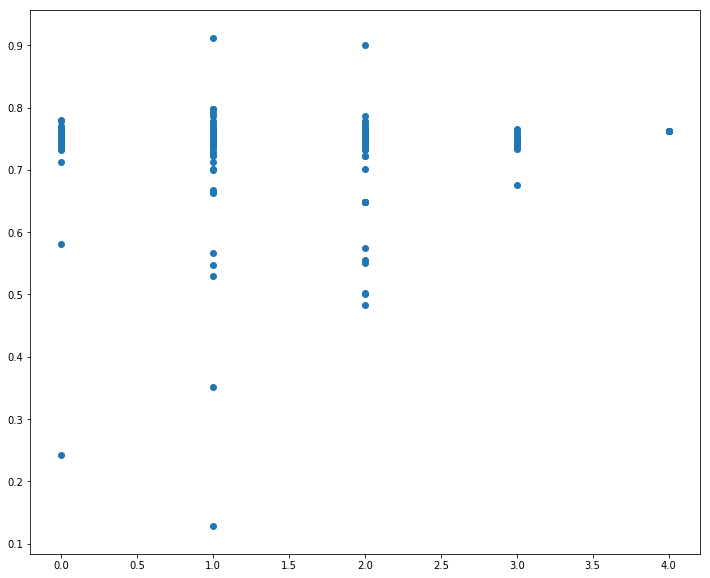

In [96]:
plt.figure(figsize=(12,10))
plt.scatter(x='pca_16_k-means_labels', y='Accuracy', data=df)

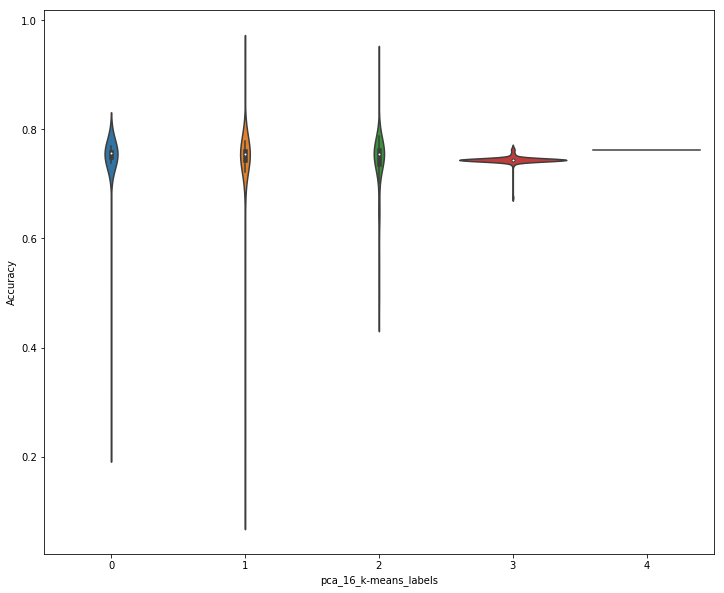

In [98]:
plt.figure(figsize=(12,10))
sns.violinplot(x='pca_16_k-means_labels', y='Accuracy', data=df)

## remove duplicates

In [104]:
df_unique = df.drop_duplicates(subset=['raw_json'], keep='first')

In [106]:
df_unique

,Name,Accuracy,Functions,Packages,Runtime,Functions_by_users,Copy_of,most_similar,index_of_similarity,raw_json,dense_tf,k-means_labels,pca_16,pca_16_k-means_labels
0,prabhulingayya-titanic-prediction-using-logist...,0.746,"['as.factor', 'gsub', 'is.na', 'mean', 'nrow',...",['base'],0.344873,"['gsub', 'rbind', 'nrow', 'predict', 'write.cs...",[],"['cnusapbo-titanic-r-code', 'joelweiss-titanic...","[0.9988202265519232, 0.5657821282835571, 0.497...","{'package:base': ['as.factor', 'gsub', 'is.na'...",[[[[[0. 0. 0. 0. ...,3,"[-0.3148670004198866, -0.14278654179285133, -0...",2
1,erskumars-titanic-survival-eda-and-survival-ra...,0.749,"['as.data.frame', 'as.numeric', 'c', 'colnames...","['dplyr', 'ggplot2', 'rpart', 'randomForest', ...",2.117813,"['labs', 'nrow', 'geom_text', 'median', 'which...",[],['erskumars-titanic-survival-eda-and-survival-...,"[0.9999999999999998, 0.4321551529106232, 0.432...","{'package:base': ['as.data.frame', 'as.numeric...",[[[[[0. 0. 0. 0. ...,0,"[-0.24574235086994245, 0.06147132148980616, 0....",2
2,paulocressoni-titanic-using-stepwise-linear-re...,0.756,"['user defined', 'user defined', 'user defined...","['MASS', 'ggplot2', 'ggthemes', 'base']",0.956229,"['gsub', 'as.numeric', 'predict', 'sub', 'mean...",[],['annafreydenzon-titanic-machine-learning-from...,"[0.5025714535073201, 0.4914360717345071, 0.471...","{'character(0)': ['fill_age_by_title'], 'packa...",[[[[[0. 0. 0. 0. ...,3,"[-0.31382700321769236, -0.14544146314971068, -...",2
3,abhayjindal-exploring-survival-on-the-titanic,0.744,"['filter', 'as.factor', 'c', 'cat', 'colnames'...","['ggplot2', 'ggthemes', 'scales', 'dplyr', 'mi...",25.718292,"['labs', 'complete', 'geom_text', 'median', 'l...",[],"['rayuga-exploring-survival-on-the-titanic', '...","[0.9991891736418617, 0.9991891736418617, 0.999...","{'c(""package:dplyr"", ""package:stats"")': ['filt...",[[[[[0. 0. 0. 0. ...,4,"[0.5095293440347878, 0.03429019034117854, 0.00...",3
4,jonmak-identify-travel-groups-in-titanic,0.734,"['user defined', 'user defined', 'user defined...","['ggplot2', 'readr', 'data.table', 'stringr', ...",16.105898,"['list', 'mean', 'as.logical', 'merge', 'geom_...",[],"['somtom-titanic-random-icebergs', 'rtreit-kag...","[0.6239748114808571, 0.2672313419911298, 0.170...","{'character(0)': ['`:=`'], 'package:base': ['a...",[[[[[0. 0. 0. 0. ...,3,"[-0.25692088149317693, -0.19752431202561158, 0...",2
5,jenioai-titanic-data-analysis-rf-prediction-0-...,0.763,"['user defined', 'user defined', 'user defined...","['randomForest', 'base']",3.578123,"['list', 'mean', 'median', 'hcl', 'cor', 'is.n...",[],['delasupreme-titanic-data-analysis-rf-predict...,"[0.9801339202416555, 0.9801339202416555, 0.980...","{'character(0)': ['aes', 'bind_rows', 'coord_f...",[[[[[0. 0. 0. 0. ...,2,"[-0.018393165764406166, -0.26255192158303475, ...",4
7,ezhilvelme-titanic-neural-network-c-4-2,0.749,"['compute', 'as.factor', 'c', 'data.frame', 'g...","['dplyr', 'ggplot2', 'neuralnet', 'base']",5.067598,"['gsub', 'neuralnet', 'ifelse', 'write.csv', '...",[],['brirush-randomforest-implementation-of-titan...,"[0.5658840970531664, 0.5658840970531664, 0.529...","{'c(""package:neuralnet"", ""package:dplyr"")': ['...",[[[[[0. 0. 0. 0. ...,3,"[-0.21072503306312207, -0.09297976809178533, -...",1
8,artsyanka-kernel1-titanic-r,0.701,"['as.character', 'as.numeric', 'c', 'cbind', '...","['caTools', 'randomForest', 'base']",0.717785,"['mean', 'ave', 'as.character', 'is.na', 'summ...",[],['thilakshasilva-predicting-titanic-survival-u...,"[0.09903837589370747, 0.09903837589370747, 0.0...","{'package:base': ['as.character', 'as.numeric'...",[[[[[0. 0. 0. 0. ...,3,"[-0.2567649309255047, -0.17871612217679708, -0...",2
9,mkgiitr-titanic-survival-prediction,0.744,"['filter', 'complete', 'apply', 'as.factor', '...","['tidyverse', 'tidyverse', 'ggplot2', 'ggtheme...",24.201274,"['labs', 'complete', 'mean', 'median', 'lapply...",[],['hemingwei-titanic-r-solution-from-megan-risd...,"[0.896395615414318, 0.895913943078311, 0.8959

In [129]:
uns  = df_unique['pca_16'].values

us = []

for u in uns:
    us.append(list(u))
    
us = np.asarray(us)

In [131]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(us)
    Sum_of_squared_distances.append(kmeans.inertia_)

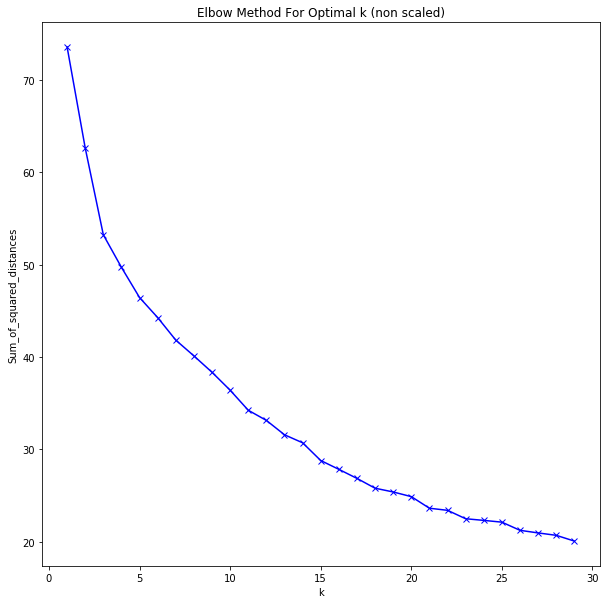

In [132]:
plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (non scaled)')
plt.show()

In [212]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(us)
kmeansPcaLabels = kmeans.predict(us)

In [213]:
df_unique['unique_labels'] = kmeansPcaLabels

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0, 0.5, 'accuracy')

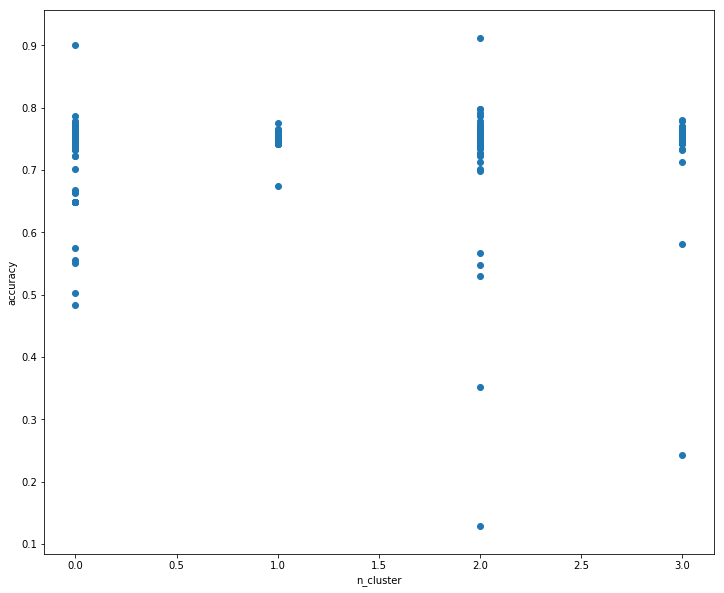

In [214]:
plt.figure(figsize=(12,10))
plt.scatter(x='unique_labels', y='Accuracy', data=df_unique)
plt.xlabel('n_cluster')
plt.ylabel('accuracy')

In [125]:
df[df['k-means_labels'] == 3]

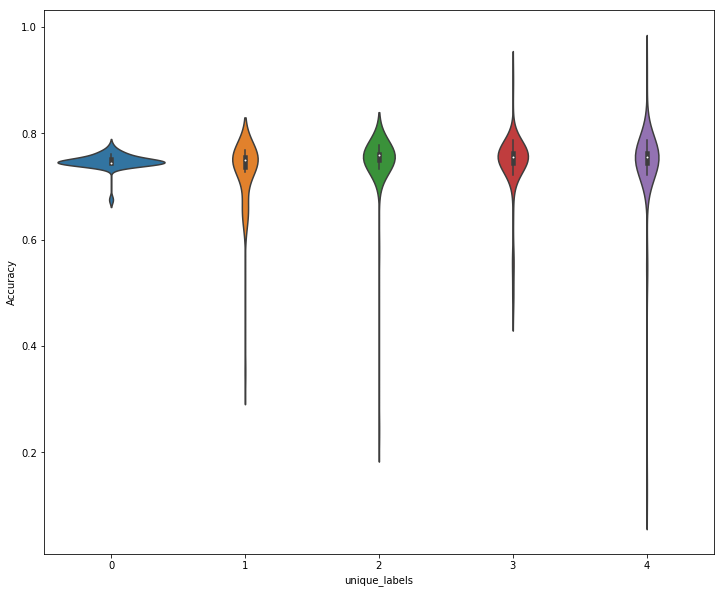

In [154]:
plt.figure(figsize=(12,10))
sns.violinplot(x='unique_labels', y='Accuracy', data=df_unique)

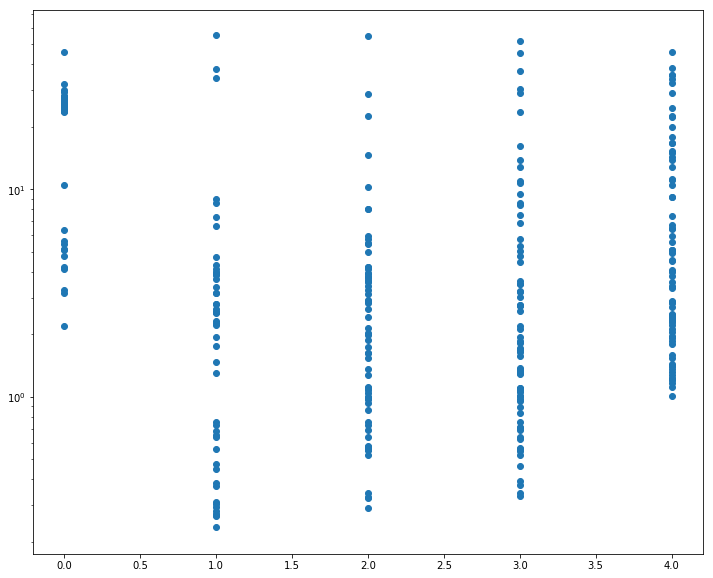

In [146]:
plt.figure(figsize=(12,10))
plt.scatter(x='unique_labels', y='Runtime', data=df_unique)
plt.yscale("log")

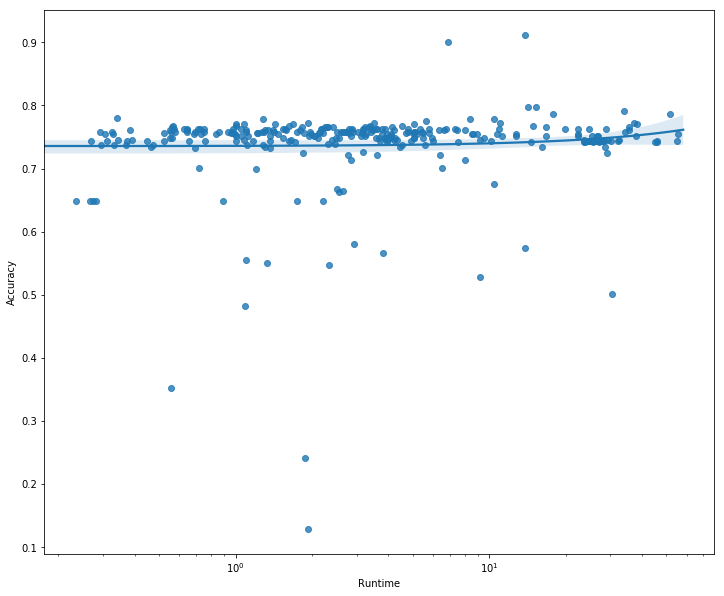

In [158]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique)
plt.xscale("log")

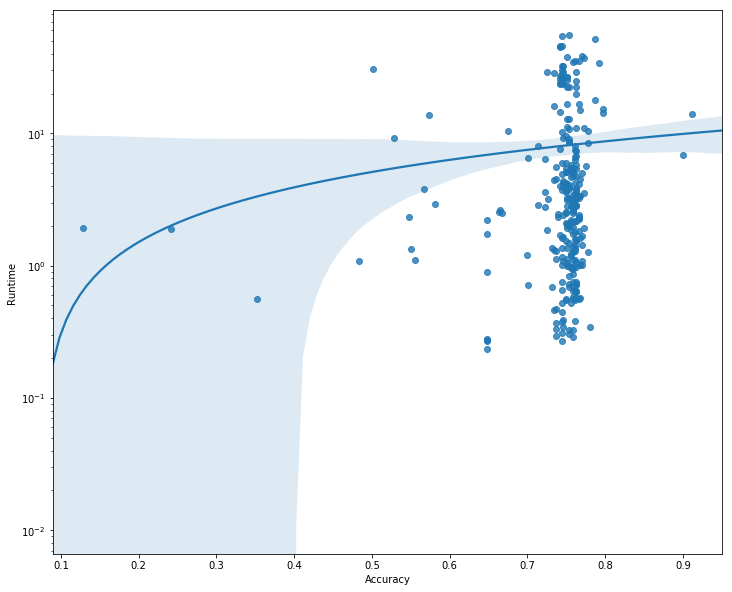

In [159]:
plt.figure(figsize=(12,10))
sns.regplot(y='Runtime', x='Accuracy', data=df_unique)
plt.yscale("log")

Text(0, 0.5, 'Runtime')

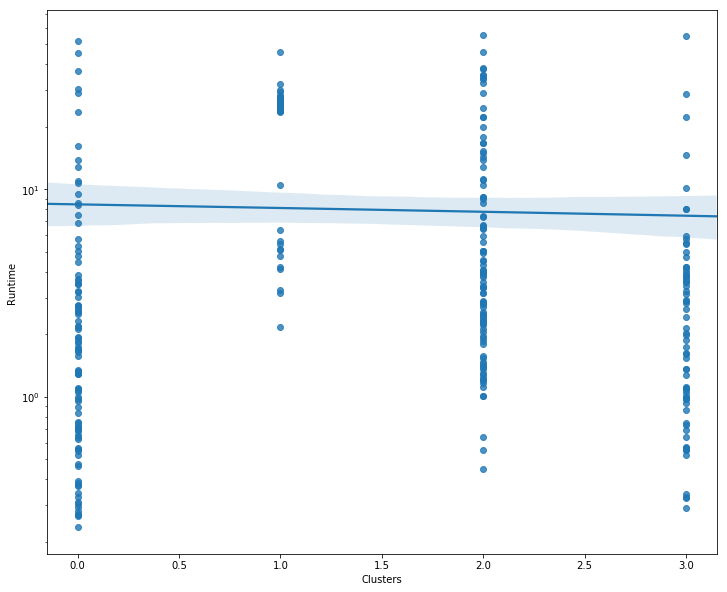

In [215]:
plt.figure(figsize=(12,10))
ax = sns.regplot(x='unique_labels', y='Runtime', data=df_unique)
plt.yscale("log")
plt.xlabel('Clusters')
plt.ylabel('Runtime')

### DBscan

In [170]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import  MinMaxScaler, MaxAbsScaler

In [174]:
scaler = MaxAbsScaler()
scaled_us = scaler.fit_transform(us)

In [198]:
db = DBSCAN(eps = 0.05, min_samples = 5).fit(us) 
labels1 = db.labels_

In [199]:
labels1

array([-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1

### umap

In [207]:
import umap.umap_ as umap
import plotly.graph_objects as go

In [201]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(us)

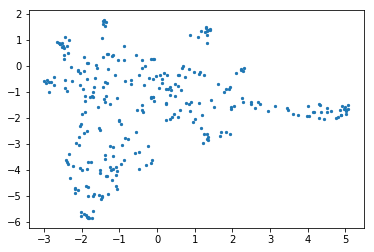

In [205]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=5.0, cmap='Spectral')

In [209]:
x = standard_embedding[:, 0]
y = standard_embedding[:, 1]
#urls = ['https://google.com', 'https://bing.com', 'https://duckduckgo.com']

f = go.FigureWidget(data=go.Scatter(
    x = standard_embedding[:, 0],
    y = standard_embedding[:, 1],
    hovertext = df_unique.Name,
    mode='markers',
    marker=dict(
        size=8,
        color=df_unique.Accuracy,
        colorscale='Spectral',
        showscale=True,
        line_width=1
    )
))

scatter = f.data[0]

f.update_layout(template='plotly_white', width=800, height=600,)

f

FigureWidget({
    'data': [{'hovertext': array(['prabhulingayya-titanic-prediction-using-logistic-regression'…

In [210]:
x = standard_embedding[:, 0]
y = standard_embedding[:, 1]
#urls = ['https://google.com', 'https://bing.com', 'https://duckduckgo.com']

f = go.FigureWidget(data=go.Scatter(
    x = standard_embedding[:, 0],
    y = standard_embedding[:, 1],
    hovertext = df_unique.Name,
    mode='markers',
    marker=dict(
        size=8,
        color=df_unique.Runtime,
        colorscale='Spectral',
        showscale=True,
        line_width=1
    )
))

scatter = f.data[0]

f.update_layout(template='plotly_white', width=800, height=600,)

f

FigureWidget({
    'data': [{'hovertext': array(['prabhulingayya-titanic-prediction-using-logistic-regression'…

In [223]:
df_unique[df_unique['Accuracy'] < 0.5]

,Name,Accuracy,Functions,Packages,Runtime,Functions_by_users,Copy_of,most_similar,index_of_similarity,raw_json,dense_tf,k-means_labels,pca_16,pca_16_k-means_labels,unique_labels
91,klashgari-titanic,0.242,"['apply', 'as.numeric', 'c', 'is.na', 'library...","['ggplot2', 'readr', 'caret', 'reshape2', 'rpa...",1.882592,"['formula', 'as.numeric', 'sum', 'predict', 'w...",[],['brirush-randomforest-implementation-of-titan...,"[0.4318369592129066, 0.4318369592129066, 0.389...","{'package:base': ['apply', 'as.numeric', 'c', ...",[[[[[0. 0. 0. 0. ...,0,"[-0.34942495200365653, 0.18395359214549048, 0....",0,3
157,rahul169-titanic-prediction,0.129,"['as.factor', 'cbind', 'colSums', 'factor', 'i...","['ggplot2', 'randomForest', 'base']",1.921240,"['factor', 'varImpPlot', 'predict', 'write.csv...",[],"['paulbisto-r-titanic-script-practice', 'prade...","[0.7186819656869823, 0.7152472332609054, 0.715...","{'package:base': ['as.factor', 'cbind', 'colSu...",[[[[[0. 0. 0. 0. ...,3,"[-0.13409056046837142, -0.1257671294360656, -0...",1,2
272,maitree-titanic-survival-list-using-random-forest,0.483,"['user defined', 'user defined', 'user defined...","['ggplot2', 'readr', 'ggplot2', 'dplyr', 'rand...",1.087711,"['nrow', 'mean', 'replace', 'which', 'as.chara...",[],['maitree-titanic-survival-list-using-classifi...,"[0.9908302848690036, 0.9375256144339168, 0.923...","{'character(0)': ['cabin_no', 'mean_class'], '...",[[[[[0. 0. 0. 0. ...,3,"[-0.27762046983384475, -0.1997278156331216, 0....",2,0
402,ivanbaj-part-2-titanic-encounters-vowpal-wabbi...,0.352,"['library', 'mutate', 'select', 'tbl_df', 'rea...","['dplyr, warn.conflicts = FALSE', 'base']",0.556960,"['mutate', 'write.csv', 'tbl_df', 'read.csv', ...",[],"['sawajid-titanic-test', 'zhaotianjing-titanic...","[0.41120320603795557, 0.37763523433734214, 0.3...","{'package:base': ['library'], 'package:dplyr':...",[[[[[0. 0. 0. 0. ...,1,"[-0.18690565800546097, -0.07133045281232266, -...",1,2
